In [74]:
import IPython
from playsound import playsound
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from PIL import ExifTags
import glob
import exiftool ## more comprehensive than PIL
import tqdm
import pandas as pd
import numpy as np


In [75]:
results = pd.read_csv('/Volumes/CatBreen/aurora_outputs/snow_poles_outputs_resized_LRe4_BS64_E100_clean_SNEX_IN/eval_orig/results.csv')
results['abs_diff'] = np.abs(results['difference'])
error = pd.read_csv('/Users/catherinebreen/Dropbox/Chapter1/WRRsubmission/data/results_wa_images_for_error_analysis/model_error_codes.csv')


In [76]:
print(results['filename'])
print(error['image_path'])

0      W2B_WSCT0020.JPG
1      W2B_WSCT0024.JPG
2      W2B_WSCT0025.JPG
3      W2B_WSCT0036.JPG
4      W2B_WSCT0050.JPG
             ...       
887    W9G_WSCT0479.JPG
888    W9G_WSCT0484.JPG
889    W9G_WSCT0500.JPG
890    W9G_WSCT0501.JPG
891    W9G_WSCT0504.JPG
Name: filename, Length: 892, dtype: object
0      E6A_WSCT0030.JPG
1      E6A_WSCT0039.JPG
2      E6A_WSCT0049.JPG
3      E6A_WSCT0052.JPG
4      E6A_WSCT0067.JPG
             ...       
887    W9G_WSCT0479.JPG
888    W9G_WSCT0484.JPG
889    W9G_WSCT0500.JPG
890    W9G_WSCT0501.JPG
891    W9G_WSCT0504.JPG
Name: image_path, Length: 892, dtype: object


In [77]:
results = results.merge(error, left_on='filename', right_on='image_path')

In [78]:
results

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,...,manual_snowdepth,difference,abs_diff,Unnamed: 0_y,image_path,error_code1,sunny_cloudy,closed_open,patchy_cont,storm
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,...,-1.7640,-12.429601,12.429601,1,W2B_WSCT0020.JPG,0,6,open,NaN,none
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,...,-3.8880,-7.546175,7.546175,30,W2B_WSCT0024.JPG,0,6,open,NaN,none
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,...,-0.3480,-4.791996,4.791996,137,W2B_WSCT0025.JPG,0,6,open,NaN,none
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,...,-2.4720,-5.888470,5.888470,77,W2B_WSCT0036.JPG,0,6,open,NaN,none
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,...,-0.3480,-3.106759,3.106759,292,W2B_WSCT0050.JPG,0,6,open,NaN,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,W9G,W9G_WSCT0479.JPG,171.48158,2.783626,170.45000,152.11696,170.02644,2.232068,168.45103,...,3.8136,-5.104132,5.104132,123,W9G_WSCT0479.JPG,5,6,closed,patchy,none
888,888,W9G,W9G_WSCT0484.JPG,172.95526,3.045614,171.33421,152.11696,171.10732,2.884687,169.20663,...,4.3152,-3.190600,3.190600,278,W9G_WSCT0484.JPG,5,6,closed,patchy,none
889,889,W9G,W9G_WSCT0500.JPG,172.80789,2.521637,171.18684,152.37895,170.93670,3.208674,168.95850,...,2.7312,-3.051646,3.051646,299,W9G_WSCT0500.JPG,5,6,closed,patchy,none
890,890,W9G,W9G_WSCT0501.JPG,172.36578,2.783626,171.18684,152.11696,171.22234,3.440930,169.19492,...,3.8136,-5.846287,5.846287,80,W9G_WSCT0501.JPG,0,6,closed,NaN,none


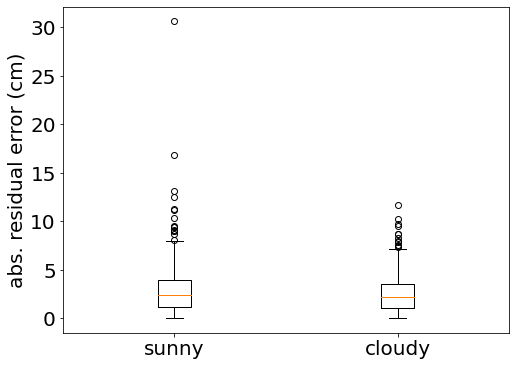

0.8931638807962388 0.37201085733435246


In [232]:
# Group data by 'canopy'
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

without_storms = results[results['error_code1']!=2]
grouped = without_storms.groupby('sunny_cloudy')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=['sunny', 'cloudy'])
plt.ylabel('abs. residual error (cm)')
plt.ylabel('abs. residual error (cm)', fontsize=20)
plt.xticks([1, 2], ['sunny', 'cloudy'], fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

# Perform ANOVA
# model = ols('abs_diff ~ sunny_cloudy', data=without_storms).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)
sunny_data = results[results['sunny_cloudy'] == 6]['abs_diff']
cloudy_data = results[results['sunny_cloudy'] == 7]['abs_diff']
t_statistic, p_value = ttest_ind(sunny_data, cloudy_data)
print(t_statistic, p_value)


In [174]:
sunny_data

Series([], Name: abs_diff, dtype: float64)

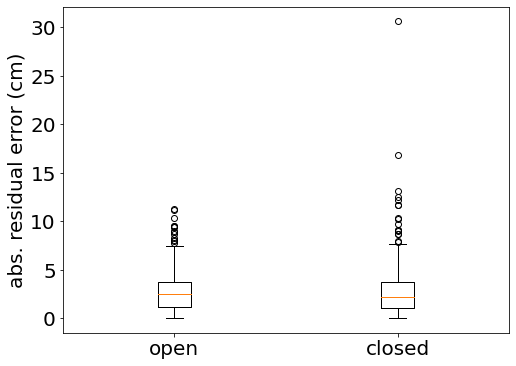

                  sum_sq     df        F    PR(>F)
closed_open     0.208075    1.0  0.03625  0.849047
Residual     4718.299512  822.0      NaN       NaN
-0.3701558483937653 0.7113544400745961


In [231]:
# Group data by 'canopy'
grouped = results.groupby('closed_open')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.ylabel('abs. residual error (cm)', fontsize=20)
#plt.xticks(fontsize= 20)
plt.xticks([1, 2], ['open', 'closed'], fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

# Perform ANOVA
model = ols('abs_diff ~ closed_open', data=without_storms).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

closed = results[results['closed_open'] == 'closed']['abs_diff']
open = results[results['closed_open'] == 'open']['abs_diff']
t_statistic, p_value = ttest_ind(closed, open)
print(t_statistic, p_value)

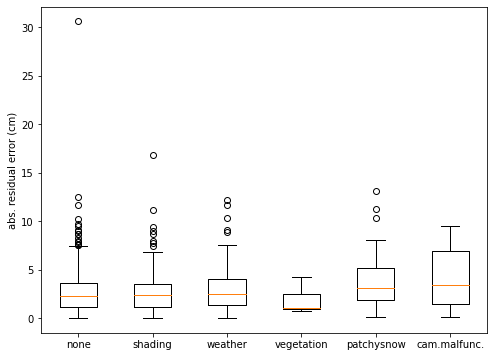

                  sum_sq     df         F    PR(>F)
error_code1    39.118897    1.0  6.871781  0.008919
Residual     4679.388690  822.0       NaN       NaN
[2, 5, 8]


In [164]:
# Group data by 'canopy'
grouped = results.groupby('error_code1')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=['none', 'shading', 'weather', 'vegetation','patchysnow', 'cam.malfunc.'])
plt.ylabel('abs. residual error (cm)')
plt.show()

# Perform ANOVA
model = ols('abs_diff ~ error_code1', data=without_storms).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Perform ANOVA
f_statistic, p_value = f_oneway(*[group.values for _, group in grouped])

# Determine significant groups
significant_groups = [bin for bin, group in grouped if group.mean() > np.mean(results['abs_diff']) and group.mean() > 0.05]
print(significant_groups)

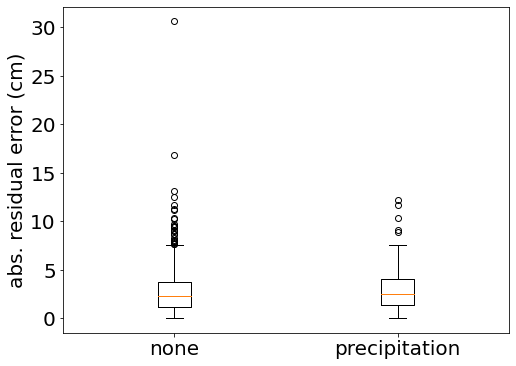

               sum_sq     df        F    PR(>F)
storm       15.007219    1.0  2.56502  0.109606
Residual  5207.142748  890.0      NaN       NaN
1.601567956401632 0.10960603243215324


In [233]:
# Group data by 'canopy'
grouped = results.groupby('storm')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=['none','precipitation'])
plt.ylabel('abs. residual error')
plt.ylabel('abs. residual error (cm)', fontsize=20)
plt.xticks([1, 2], ['none','precipitation'], fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

# Perform ANOVA
model = ols('abs_diff ~ storm', data=results).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

storm = results[results['storm'] == 'storm']['abs_diff']
none = results[results['storm'] == 'none']['abs_diff']
t_statistic, p_value = ttest_ind(storm, none)
print(t_statistic, p_value)

In [236]:
# results

In [234]:
ttest_ind(storm, none)

Ttest_indResult(statistic=1.601567956401632, pvalue=0.10960603243215324)

In [181]:
## group by month 
dateinfo = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/labeledImgs_datetime_info.csv')
dateinfo.rename(columns={'filenames':'filename'}, inplace=True)
results = results.merge(dateinfo, on = 'filename', how='left')
results["date"] = pd.to_datetime(results["datetimes"])


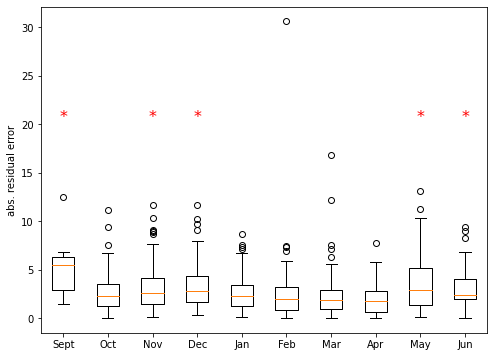

[5, 6, 9, 11, 12]
               sum_sq     df          F    PR(>F)
month       73.837124    1.0  12.764384  0.000372
Residual  5148.312843  890.0        NaN       NaN


In [238]:
# Extract month from 'date' column
results['month'] = results['date'].dt.month

# Define custom order for months
custom_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
custom_labels = ['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']


# Group data by 'month' and calculate average error
grouped = results.groupby('month')['abs_diff']

# Create boxplot with custom order
plt.figure(figsize=(8, 6))
plt.boxplot([grouped.get_group(month).values for month in custom_order], labels=custom_labels)
plt.text(1, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(3, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(4, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(9, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(10, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.ylabel('abs. residual error')
plt.show()

# Perform ANOVA
f_statistic, p_value = f_oneway(*[group.values for _, group in grouped])

# Determine significant groups
significant_groups = [bin for bin, group in grouped if group.mean() > np.mean(results['abs_diff']) and group.mean() > 0.05]
print(significant_groups)

# Perform ANOVA
model = ols('abs_diff ~ month', data=results).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


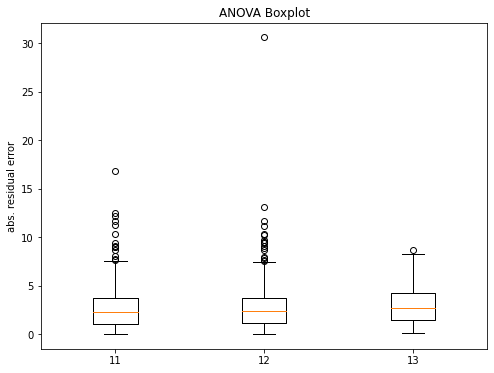

               sum_sq     df         F    PR(>F)
hour         2.161098    1.0  0.368464  0.543998
Residual  5219.988869  890.0       NaN       NaN


In [116]:
## group by hour of day 
results['hour'] = results['date'].dt.hour

# Group data by 'month' and calculate average error
grouped = results.groupby('hour')['abs_diff']

# Create boxplot with custom order
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.title('ANOVA Boxplot')
plt.ylabel('abs. residual error')
plt.show()

# Perform ANOVA
model = ols('abs_diff ~ hour', data=results).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

In [86]:
np.min(results['automated_depth'])

-13.097043311776249

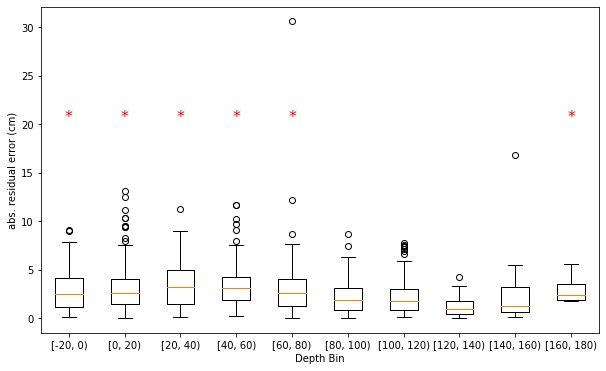

5.487884700866783 2.2986809374072742e-07
[Interval(-20, 0, closed='left'), Interval(0, 20, closed='left'), Interval(20, 40, closed='left'), Interval(40, 60, closed='left'), Interval(60, 80, closed='left'), Interval(160, 180, closed='left')]
               sum_sq     df         F        PR(>F)
bin        277.428711    9.0  5.487885  2.298681e-07
Residual  4942.954221  880.0       NaN           NaN


In [239]:
## group by snow depth
# Define bin edges
bin_edges = np.arange(-20, 200, 20)  # Bins of width 10 from 0 to 150

# Create 'bin' column based on 'depth' values
results['bin'] = pd.cut(results['automated_depth'], bins=bin_edges, right=False, include_lowest=True)

# Group data by 'bin' and calculate average error
grouped = results.groupby('bin')['abs_diff']

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([group.values for _, group in grouped], labels=[str(bin) for bin in grouped.groups.keys()], vert=True)
plt.ylabel('abs. residual error (cm)')
plt.xlabel('Depth Bin')
plt.text(1, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(2, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(3, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(4, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(5, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.text(10, 20, '*', ha='center', va='bottom', color='red', fontsize=16)
plt.show()

# Perform ANOVA
f_statistic, p_value = f_oneway(*[group.values for _, group in grouped])
print(f_statistic, p_value)
# Determine significant groups
significant_groups = [bin for bin, group in grouped if group.mean() > np.mean(results['abs_diff']) and group.mean() > 0.05]
print(significant_groups)

# Perform ANOVA
model = ols('abs_diff ~ bin', data=results).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# # Highlight significant groups
# for i, bin_label in enumerate(grouped.groups.keys()):
#     if bin_label in significant_groups:
#         for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
#             plt.setp(box[element][i], color='red', linewidth=2)

# plt.show()

In [222]:
import statsmodels.stats.multicomp as mc
import scipy.stats as stats

comp = mc.MultiComparison(results['abs_diff'], results['month'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
tbl#[tbl['reject'] == 'True']

group1,group2,stat,pval,pval_corr,reject
1,2,0.0873,0.9305,1.0,False
1,3,0.8843,0.3776,1.0,False
1,4,2.6082,0.0098,0.441,False
1,5,-2.74,0.0067,0.3011,False
1,6,-1.5422,0.1255,1.0,False
1,9,-4.1207,0.0001,0.0031,True
1,10,-0.507,0.6126,1.0,False
1,11,-1.7984,0.0735,1.0,False
1,12,-2.5674,0.0109,0.4901,False
2,3,0.5786,0.5635,1.0,False


In [151]:
for bin, group in grouped:
    if str(bin) == '[40, 60)':
        save = group.index

In [155]:
results.loc[save]#.groupby('Camera').count()

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,...,sunny_cloudy,closed_open,patchy_cont,storm,Unnamed: 0,datetimes,date,month,hour,bin
22,22,W2B,W2B_WSCT0227.JPG,138.76580,75.616370,138.176320,168.88422,137.663220,75.889380,137.604130,...,7,open,NaN,none,13442,1/11/20 12:00,2020-01-11 12:00:00,1,12,"[40, 60)"
60,60,E6A,E6A_WSCT0224.JPG,107.96579,17.716959,109.292110,171.50409,106.887085,17.363388,108.487730,...,6,open,cont,none,4850,12/3/19 12:00,2019-12-03 12:00:00,12,12,"[40, 60)"
61,61,E6A,E6A_WSCT0233.JPG,108.11316,16.669006,108.997370,168.36023,106.881690,16.837866,108.812996,...,6,open,cont,none,4796,12/6/19 12:00,2019-12-06 12:00:00,12,12,"[40, 60)"
62,62,E6A,E6A_WSCT0235.JPG,107.81842,16.145030,109.144740,169.93216,106.921550,16.053135,108.784790,...,6,open,cont,none,4687,12/7/19 11:00,2019-12-07 11:00:00,12,11,"[40, 60)"
63,63,E6A,E6A_WSCT0240.JPG,107.96579,16.407017,109.586845,168.88422,107.545510,16.579500,109.068490,...,7,open,cont,none,4516,12/8/19 13:00,2019-12-08 13:00:00,12,13,"[40, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,W9G,W9G_WSCT0174.JPG,168.97632,11.167252,166.765800,138.75555,167.989060,11.603707,165.894210,...,6,closed,NaN,none,9235,12/18/19 11:00,2019-12-18 11:00:00,12,11,"[40, 60)"
859,859,W9G,W9G_WSCT0175.JPG,169.27106,11.429240,166.913160,139.27953,167.778820,11.365517,165.679900,...,6,closed,NaN,none,9215,12/18/19 12:00,2019-12-18 12:00:00,12,12,"[40, 60)"
860,860,W9G,W9G_WSCT0178.JPG,169.27106,11.167252,166.913160,139.54152,167.582900,11.257669,165.479450,...,6,closed,NaN,none,9279,12/20/19 11:00,2019-12-20 11:00:00,12,11,"[40, 60)"
882,882,W9G,W9G_WSCT0459.JPG,169.56580,2.783626,169.418430,131.15790,168.863420,2.315337,167.173830,...,6,closed,NaN,none,9028,5/8/20 12:00,2020-05-08 12:00:00,5,12,"[40, 60)"


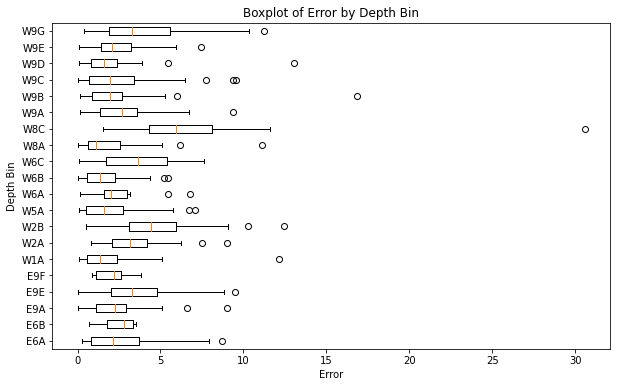

['E9E', 'W2A', 'W2B', 'W6C', 'W8C', 'W9G']


In [129]:
## group by camera
# Group data by 'bin' and calculate average error
grouped = results.groupby('Camera')['abs_diff']

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([group.values for _, group in grouped], labels=[str(bin) for bin in grouped.groups.keys()], vert=False)
plt.title('Boxplot of Error by Depth Bin')
plt.xlabel('Error')
plt.ylabel('Depth Bin')
plt.show()

# Perform ANOVA
f_statistic, p_value = f_oneway(*[group.values for _, group in grouped])

# Determine significant groups
significant_groups = [bin for bin, group in grouped if group.mean() > np.mean(results['abs_diff']) and group.mean() > 0.05]
print(significant_groups)
